
### Name: Jingwen Zhu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from scipy.stats import norm
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

### Section 1

In [2]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('C:\\Users\\17855\\OneDrive\\Desktop\\Modeling\\melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


#### a) Print the number of missing values for each variable. 

In [3]:
missing_values = df.isnull().sum()
print(missing_values)

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


#### Ans:
Missing values can be problematic for any column when using them in a model, but it depends. It should analyze the importance of each feature for your specific use case, and decide whether to impute, drop, or perform some other operation on the missing values. In this dataset, we can find out there are many missing values in Building Area, Year Built and Concil Area. Missing values in these columns can be problematic because they provide important information about the property.

#### b) Create a bar chart that shows the median housing price for each regionname. 

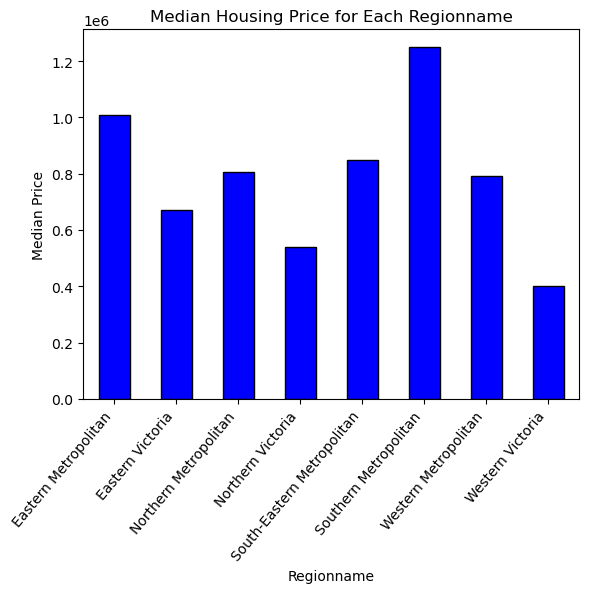

In [4]:
median_prices = df.groupby('Regionname')['Price'].median()
median_prices.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Median Housing Price for Each Regionname')
plt.xlabel('Regionname')
plt.ylabel('Median Price')
plt.xticks(rotation=50, ha='right')
plt.show()

#### Ans
Yes, I think the region name will affect housing price. From the bar chart, the median housing price in Victoria is lower than Metropolitan. The demand for housing in certain regions might be higher than in others, which can lead to higher prices. Likewise, if the supply of available properties is limited in a particular region, this can also drive up prices. Areas with lower crime rates and a higher perception of safety can command higher housing prices.

#### c) Use seaborn's lmplot function to create a scatter plot with latitude on the x-axis and longitude on the y-axis, and colored by distance. What does this plot suggest?

<Figure size 1000x600 with 0 Axes>

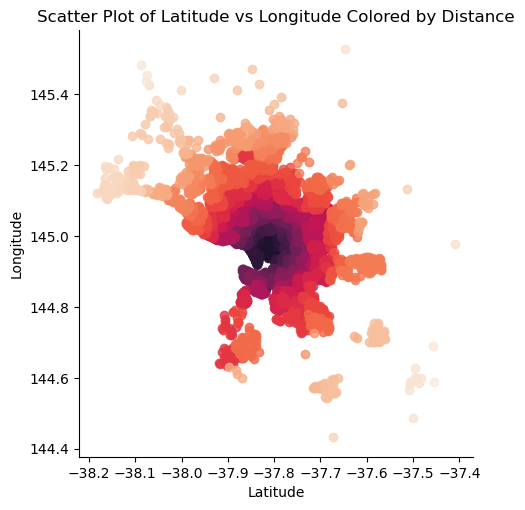

In [5]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='Lattitude', y='Longtitude', data=df, hue='Distance', palette='rocket', legend=False, fit_reg=False)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Scatter Plot of Latitude vs Longitude Colored by Distance')
plt.show()

#### Ans:
In this scatter plot graph, we can find around Lattitude -37.8 and Longtitude 144.9 will have more houses. And from this center, the dots start dispersion. This area might be the most densely populated area.

### Section 2

#### a) What are the null and alternative hypotheses?

#### Ans:
Null Hypothesis (H0): The housing prices in the selected region do not differ from the population mean.

Alternative hypothesis (Ha): The housing prices in the selected region differ from the population mean. 

#### b) Use the p-value to decide whether to reject or to not reject the null hypothesis. Explain your reasoning.

In [6]:
population_mean = df['Price'].mean()

selected_region = 'Western Metropolitan'
sample = df[df['Regionname'] == selected_region].sample(n=25, random_state=42)

sample_mean = sample['Price'].mean()
sample_std = sample['Price'].std()
standard_error = sample_std / np.sqrt(25)
z_score = (sample_mean - population_mean) / standard_error
p_value = 2 * (1 - norm.cdf(abs(z_score)))

if p_value < 0.05:
    print("P value is:", p_value,"Reject the null hypothesis. The housing prices in the selected region are significantly different from the population mean.")
else:
    print("P value is:", p_value,"Fail to reject the null hypothesis. There's no significant evidence that the housing prices in the selected region differ from the population mean.")

P value is: 0.00015849013783530985 Reject the null hypothesis. The housing prices in the selected region are significantly different from the population mean.


In [7]:
population_mean = df['Price'].mean()

selected_region = 'Southern Metropolitan'
sample = df[df['Regionname'] == selected_region].sample(n=25, random_state=42)

sample_mean = sample['Price'].mean()
sample_std = sample['Price'].std()
standard_error = sample_std / np.sqrt(25)
z_score = (sample_mean - population_mean) / standard_error
p_value = 2 * (1 - norm.cdf(abs(z_score)))

if p_value < 0.05:
    print("P value is:", p_value,". Reject the null hypothesis. The housing prices in the selected region are significantly different from the population mean.")
else:
    print("P value is:", p_value,". Fail to reject the null hypothesis. There's no significant evidence that the housing prices in the selected region differ from the population mean.")

P value is: 0.811846282303365 . Fail to reject the null hypothesis. There's no significant evidence that the housing prices in the selected region differ from the population mean.


#### Ans:
When I choose the regionname Western Metropolitan, the P value is 0.000158 which is less than 0.05. It will reject the null. The housing prices in the Northern Metropolitan region are significantly different from the population mean in Melbourne. The difference is not likely due to random chance and suggests a real difference in housing prices between this region and the overall Melbourne market.

When I choose Southern Metropolitan, the P value is 0.8118 which is larger than the level of significance. It fail to reject the null hypothesis. There is no significant evidence that the housing prices in the Southern Metropolitan region differ from the population mean in Melbourne. The difference observed between the sample mean and population mean might be due to random chance, and we cannot confidently conclude that there's a real difference in housing prices between this region and the overall Melbourne market.

### Section 3

#### a) Scatterplot of the two variables.
I assume Rooms and Bathroom have high correlation coefficient.

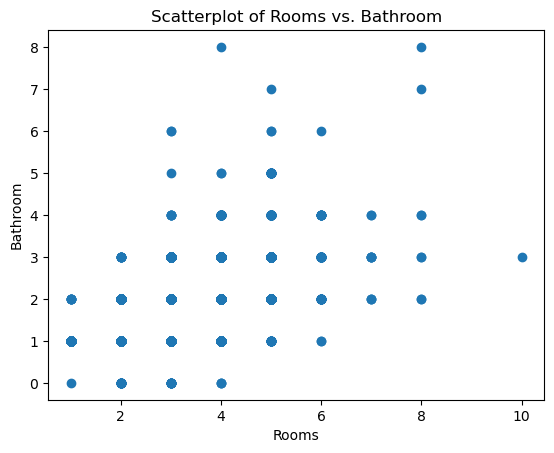

In [8]:
plt.scatter(df['Rooms'], df['Bathroom'])
plt.xlabel('Rooms')
plt.ylabel('Bathroom')
plt.title('Scatterplot of Rooms vs. Bathroom')
plt.show()

#### b) Pearson correlation coeffcient between the two variables.

In [9]:
correlation_coefficient = df['Rooms'].corr(df['Bathroom'])
print(f"Pearson correlation coefficient: {correlation_coefficient}")

Pearson correlation coefficient: 0.5929340810557577


#### c) Scatterplot of the fitted values against the residuals (with respect to a line of least squares fit).

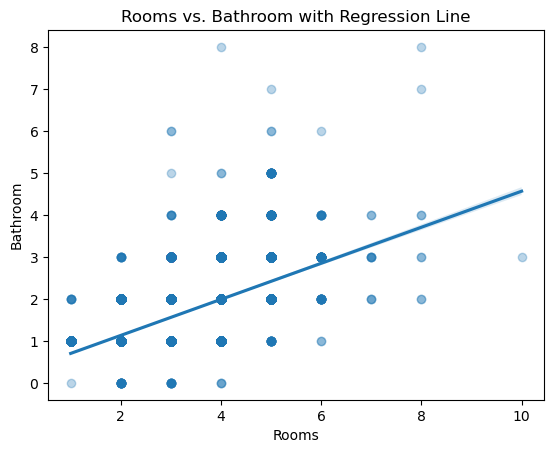

In [10]:
sns.regplot(x='Rooms', y='Bathroom', data=df, scatter_kws={'alpha': 0.3})
plt.xlabel('Rooms')
plt.ylabel('Bathroom')
plt.title('Rooms vs. Bathroom with Regression Line')
plt.show()

### Section 4

#### a) Pick three variables that might be linearly correlated with Price

In [11]:
independent_variables = df[['Rooms', 'Bathroom', 'Distance']]
print(independent_variables.corr())

             Rooms  Bathroom  Distance
Rooms     1.000000  0.592934  0.294203
Bathroom  0.592934  1.000000  0.127155
Distance  0.294203  0.127155  1.000000


#### Ans:
I choose Rooms, Bathroom, Distance as my variabless. None of these variables have Pearson correlation coefficients greater than 0.75 they do not have multicollinearity.

#### b) Build the ordinary least squares regression model. Report and interpret the R2.

In [12]:
X = df[['Rooms', 'Bathroom', 'Distance']]
y = df['Price']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     2880.
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        06:42:44   Log-Likelihood:            -1.9746e+05
No. Observations:               13580   AIC:                         3.949e+05
Df Residuals:                   13576   BIC:                         3.950e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.096e+05   1.45e+04     14.416      0.0

#### Ans:
The R^2 is 0.389 which is between 0-1. 38.9% of the variation in housing prices can be attributed to the variation in the number of rooms, bathrooms, and distance from CBD. The remaining 61.1% of the variance in housing prices is not explained by these three variables in the model.

### Section 5

#### a) Create a validation data set using ten percent of the data. (Retain the rest of the data for training purposes.)

In [13]:
train_data, validation_data = train_test_split(df, test_size=0.1, random_state=42)
train_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
12145,Ringwood North,81 Kubis Dr,4,h,1005000.0,S,Jellis,29/07/2017,19.9,3134.0,...,2.0,2.0,785.0,NaN,NaN,Maroondah,-37.79465,145.22440,Eastern Metropolitan,3619.0
5646,South Yarra,16/384 Toorak Rd,2,u,550000.0,S,hockingstuart,14/05/2016,3.3,3141.0,...,1.0,1.0,0.0,NaN,NaN,Stonnington,-37.84060,145.00350,Southern Metropolitan,14887.0
11228,Templestowe Lower,38 Caroline Dr,3,h,1350000.0,S,Jellis,12/08/2017,12.4,3107.0,...,2.0,3.0,725.0,NaN,NaN,Manningham,-37.76616,145.11207,Eastern Metropolitan,5420.0
8317,Reservoir,6 Joffre St,2,h,1025000.0,S,Barry,29/04/2017,11.2,3073.0,...,2.0,1.0,715.0,NaN,NaN,Darebin,-37.73020,145.01290,Northern Metropolitan,21650.0
3855,Malvern East,6/5 Peak St,2,u,370000.0,VB,hockingstuart,14/05/2016,11.2,3145.0,...,1.0,1.0,0.0,NaN,1965.0,Stonnington,-37.88010,145.08740,Southern Metropolitan,8801.0


In [14]:
validation_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1061,Brighton,1a Mair St,3,h,2600000.0,S,Buxton,6/08/2016,11.2,3186.0,...,2.0,3.0,588.0,NaN,NaN,Bayside,-37.9287,144.9920,Southern Metropolitan,10579.0
6482,West Melbourne,5/467 King St,2,u,620000.0,S,Jellis,28/05/2016,1.9,3003.0,...,1.0,1.0,0.0,83.0,2002.0,Melbourne,-37.8091,144.9520,Northern Metropolitan,2230.0
8395,St Kilda,7/29 Marine Pde,3,u,1000000.0,SP,McGrath,22/04/2017,6.1,3182.0,...,1.0,0.0,0.0,115.0,1930.0,Port Phillip,-37.8718,144.9767,Southern Metropolitan,13240.0
4659,Pascoe Vale,8/16 Pascoe St,3,t,430000.0,VB,Trimson,18/06/2016,9.9,3044.0,...,2.0,1.0,146.0,106.0,2006.0,Moreland,-37.7152,144.9346,Northern Metropolitan,7485.0
7386,South Kingsville,2/77 Vernon St,2,h,392250.0,SP,Gunn&Co,24/09/2016,9.1,3015.0,...,1.0,2.0,462.0,NaN,1970.0,Hobsons Bay,-37.8331,144.8715,Western Metropolitan,984.0


#### b) Engineer (i.e., create) one new feature, i.e., one feature in addition to the three you used in the previous question.

In [15]:
df['TotalLivingSpaces'] = df['Rooms'] + df['Bathroom'] + df['Bedroom2']

#### Ans:
For this part, I will add a new feature called TotalLivingSpaces which add bathroom, rooms, bedroom2.

#### c) Using this validation data set and the R2 metric, decide if this new feature improves the model. Explain.

In [16]:
## Spliting data
df['TotalLivingSpaces'] = df['Rooms'] + df['Bathroom'] + df['Bedroom2']
train_data, validation_data = train_test_split(df, test_size=0.1, random_state=42)

In [17]:
## Training dat
X_train = train_data[['Rooms', 'Bathroom', 'TotalLivingSpaces']]
y_train = train_data['Price']
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

In [18]:
## Validation data
X_validation = validation_data[['Rooms', 'Bathroom', 'TotalLivingSpaces']]
y_validation = validation_data['Price']
X_validation = sm.add_constant(X_validation)
r2_validation = model.rsquared_adj
print(f"Adjusted R-squared (R²) for the validation dataset: {r2_validation}")

Adjusted R-squared (R²) for the validation dataset: 0.2916417472162347


#### Ans:
The R^2 with this new feature is 0.292 which is slightly lower than previous R^2 0.389.  This indicates that the new feature 'TotalLivingSpaces' does not significantly improve the model's explanatory power for the validation dataset.

### Section 6

#### a) Create a new binary variable called above_median, which indicates whether a house's price is above the median price for houses in the overall set of data.

In [19]:
median_price = df['Price'].median()
df['above_median'] = df['Price'] > median_price
df['above_median'] = df['above_median'].astype(int)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,TotalLivingSpaces,above_median
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,5.0,1
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,5.0,1
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,8.0,1
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,8.0,0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,8.0,1


#### b) Use the model you developed for question #5, as well as the same split of the overall data set into testing and training data sets. How accurate is this model at predicting above_median on the training data set?

In [20]:
train_data, test_data = train_test_split(df, test_size=0.1, random_state=42)
X_train = train_data[['Rooms', 'Bathroom', 'TotalLivingSpaces']]
y_train = train_data['Price']
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

price_predictions_train = model.predict(X_train)
binary_predictions_train = (price_predictions_train > median_price).astype(int)
accuracy_train = np.mean(binary_predictions_train == train_data['above_median'])

print(f"Accuracy of the model at predicting above_median on the training dataset: {accuracy_train}")

Accuracy of the model at predicting above_median on the training dataset: 0.6620847651775487


#### Ans:
The accuracy at predicting above_median on the training dataset is 0.6621

#### c) Fit a logistic regression model using the same set of training data (i.e., with the same independent variables, and targeted at above_median as the dependent variable). How accurate is this model at predicting above_median on the training data set?

In [21]:
train_data, test_data = train_test_split(df, test_size=0.1, random_state=42)

X_train = train_data[['Rooms', 'Bathroom', 'TotalLivingSpaces']]
y_train = train_data['above_median']
X_train = sm.add_constant(X_train)

logit_model = sm.Logit(y_train, X_train).fit()
probability_predictions_train = logit_model.predict(X_train)
binary_predictions_train = (probability_predictions_train > 0.5).astype(int)
accuracy_train = np.mean(binary_predictions_train == train_data['above_median'])

print(f"Accuracy of the logistic regression model at predicting above_median on the training dataset: {accuracy_train}")

Optimization terminated successfully.
         Current function value: 0.589114
         Iterations 6
Accuracy of the logistic regression model at predicting above_median on the training dataset: 0.6791850760922926


#### Ans:
The accuracy of 0.6792 on the training dataset means that the logistic regression model correctly predicts whether a house's price is above the median price about 67.92% of the time which means that it correctly classifies about 67.92% of the houses as having prices above or below the median price.

The logistic regression model generates probability predictions for each observation in the dataset. These probabilities represent the estimated likelihood that a house's price is above the median price.
I apply a threshold to these probability predictions to convert them into binary predictions. In this case, I used a threshold of 0.5.
If the predicted probability for a given observation is greater than the threshold (0.5), then assign a value of 1 to the binary prediction, indicating that the model predicts the house's price to be above the median price. If the predicted probability is less than or equal to the threshold, then assign a value of 0 to the binary prediction, indicating that the model predicts the house's price to be below or equal to the median price. Finally, calculate the accuracy by comparing the binary predictions to the actual above_median values in the training dataset. The accuracy is the proportion of correct predictions out of the total number of predictions.

### Section 7

In [27]:

# Eliminate nans
 # Fill missing values in Car, BuildingArea, and YearBuilt columns with their median values
df['Car'] = df['Car'].fillna(df['Car'].median())
df['BuildingArea'] = df['BuildingArea'].fillna(df['BuildingArea'].median())
df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].median())

print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
Suburb                  0
Address                 0
Rooms                   0
Type                    0
Price                   0
Method                  0
SellerG                 0
Date                    0
Distance                0
Postcode                0
Bedroom2                0
Bathroom                0
Car                     0
Landsize                0
BuildingArea            0
YearBuilt               0
CouncilArea          1369
Lattitude               0
Longtitude              0
Regionname              0
Propertycount           0
TotalLivingSpaces       0
above_median            0
dtype: int64


## RIDGE

In [25]:
from sklearn.linear_model import Ridge

# Select all numerical columns, excluding 'Price'
numerical_columns = df.select_dtypes(include=[np.number]).drop(columns=['Price']).columns

# Prepare the independent (X) and dependent (y) variables
X = df[numerical_columns]
y = df['Price']

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize the independent variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define the Ridge Regression model with hyperparameter tuning using GridSearchCV
ridge = Ridge()
params = {'alpha': np.logspace(-5, 5, 50)}  # Define a range of α values to search
grid = GridSearchCV(ridge, param_grid=params, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

# Get the best α parameter
best_alpha = grid.best_params_['alpha']
print(f"Best α (alpha) parameter for the Ridge Regression model: {best_alpha}")

# Get the R² on the validation dataset
ridge_best = grid.best_estimator_
y_val_pred = ridge_best.predict(X_val_scaled)
r2_val = r2_score(y_val, y_val_pred)
print(f"R² of the Ridge Regression model on the validation dataset: {r2_val:.4f}")

Best α (alpha) parameter for the Ridge Regression model: 1456.3484775012444
R² of the Ridge Regression model on the validation dataset: 0.6331


#### Ans:
The Ridge Regression model is an extension of linear regression that includes a regularization term, which helps prevent overfitting and reduces the complexity of the model. The α parameter controls the strength of the regularization. Larger values of α result in stronger regularization and simpler models, while smaller values of α result in weaker regularization and more complex models.

In this script, we perform hyperparameter tuning by searching over a range of α values using GridSearchCV, a method from the sklearn library that performs an exhaustive search over specified parameter values for an estimator. It uses cross-validation to find the best α parameter that maximizes the R² score. After finding the best α value, we fit the Ridge Regression model with the selected α and report the R² on the validation dataset.

Here are the steps to define α:

1) Define a range of α values: Create a range of α values using np.logspace(-5, 5, 50). This generates an array of 50 values evenly spaced on a logarithmic scale between 10⁻⁵ and 10⁵.

2) Instantiate the Ridge Regression model and GridSearchCV: Create an instance of the Ridge Regression model from sklearn.linear_model. Then, instantiate GridSearchCV with the Ridge model, the range of α values (params), a 5-fold cross-validator (cv=5), the scoring metric ('r2'), and n_jobs=-1 to use all available cores of the processor for faster computation.

3) Fit GridSearchCV to the training data: Fit the GridSearchCV instance to the scaled training data (X_train_scaled and y_train). This process involves training a separate Ridge Regression model for each α value in the search space and evaluating its performance using 5-fold cross-validation. The average R² score is computed for each α value.

4) Retrieve the best α parameter: After fitting GridSearchCV to the data, access the best_params_ attribute to get the best α value, which corresponds to the highest average R² score across the cross-validation folds.

The best α parameter found for the Ridge Regression model is 1456.348. The α parameter in Ridge Regression controls the strength of the regularization effect. A higher value of α results in stronger regularization and a more stable model that is less likely to overfit the training data. Ridge Regression adds an L2 penalty term to the linear regression, which encourages the model to have smaller coefficients for less important features but does not push them to zero.

The R² value of 0.6331 represents the proportion of the variance in the dependent variable (Price) that is predictable from the independent variables. An R² value of 0.6331 suggests that the Ridge Regression model can explain approximately 63.31% of the variation in housing prices based on the given features in the validation dataset. This value indicates that the model has a relatively moderate fit on the validation data, similar to the LASSO Regression model. I also do a LASSO and I got R² is 0.6367. The difference in R² values between the LASSO and Ridge Regression models (0.6367 and 0.6331, respectively) is relatively small. In this case, may choose either model, depending on your preferences or specific requirements. LASSO tends to produce sparser models, while Ridge Regression results in models with smaller but non-zero coefficients for less important features.